In [1]:
# load the library
library(CAVAanalytics)
# ignore this line, it is just to visualize the plots in this notebook
Sys.setenv("PROJ_LIB" = "/opt/conda/envs/cava/share/proj")

Loading required package: loadeR.java

Loading required package: rJava

Java version 17x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: magrittr



## 1st step: data loading
Loading the data is always the first step of CAVAanalytics. It is the second step that changes the most and it is where we perform different analyses.
The load_data functions allow users to load netcdf file stored locally (specific data structure has to be followed, for more info type ?loade_data) or remotely. In this notebook we will use CORDEX-CORE data stored remotely at the University of Cantabria server. This is one of the main feature of CAVAanalytics


In [2]:
# this function has several arguments. To load CORDEX-CORE data simply specify path.to.data as CORDEX-XORE and the
# domain of interest. For example Sudan is in the African domain. 
# You can check the domain here (https://www.researchgate.net/figure/The-ten-CORDEX-CORE-model-domains-simulated-by-the-model-REMO-North-America-NAM_fig1_337370761)
# if you want to also load observatipnal data, simply specify W5E5 in path.to.obs and years.hist. 
# When you specify years.hist, you would automatically load the historical simulations run of CORDEX-CORE.
# aggr.m allows user to perform monthly aggregation if daily values are not needed. 
# This is almost always the case except when calculation of agroclimatic indicators is needed. 

exmp1 <- load_data(country = "Sudan", path.to.data = "CORDEX-CORE", variable = "pr", years.proj = 2020:2030, 
                   years.hist = 1980:1990,
                   path.to.obs = NULL, buffer = 0, domain = "AFR-22", xlim=NULL, ylim=NULL, aggr.m="none")


2023-05-12 13:27:06 Retrieving CORDEX-CORE data, RCM RegCM4. This may take a while... 


2023-05-12 13:27:08 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:30:11 Done


2023-05-12 13:27:09 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:30:14 Done


2023-05-12 13:27:11 Loading CORDEX-AFR-22_NCC-NorESM1-M_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:30:18 Done


2023-05-12 13:30:19 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:33:24 Done


2023-05-12 13:30:19 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:33:25 Done


2023-05-12 13:30:20 Loading CORDEX-AFR-22_NCC-NorESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:33:39 Done


2023-05-12 13:33:40 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:36:54 Done


2023-05-12 13:33:41 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_rcp85_r1i1p1_ICTP-RegCM4-7_

## 2nd step: climate_change_signal
Climate change signal is one of the function available in step 2 of the CAVAanalytics framework. There are several arguments in this function but mainly it allows user to look at the relative changes in the future compared to baseline. The baseline is defiend based on years.hist

In [3]:
# this funciton does several things in the background. 
# Firstly, it is possuble to look at specific seasons with the argument season. 
# In this case we are looking at the whole year.
# Secondly, it is possible to perform bias correction and calculate agroclimatic indicators, always relative to the baseline period 

ccs <- climate_change_signal(data=exmp1,season = 1:12,  bias.correction = FALSE, uppert = NULL, lowert = NULL, 
                             consecutive = F, duration = "max")


2023-05-12 13:38:04 climate change signal, season 1-2-3-4-5-6-7-8-9-10-11-12. Climate change signal for total pr

2023-05-12 13:38:44 Done



## 3rd step: plotting
Plotting allows us to visualize the results of step2 in a very flexible way

2023-05-12 13:42:19 Visualizing ensemble mean

2023-05-12 13:42:19 Prepare for plotting

2023-05-12 13:42:19 Done

2023-05-12 13:42:20 Visualizing individual members, argument stat is ignored

2023-05-12 13:42:20 Prepare for plotting

2023-05-12 13:42:20 Done



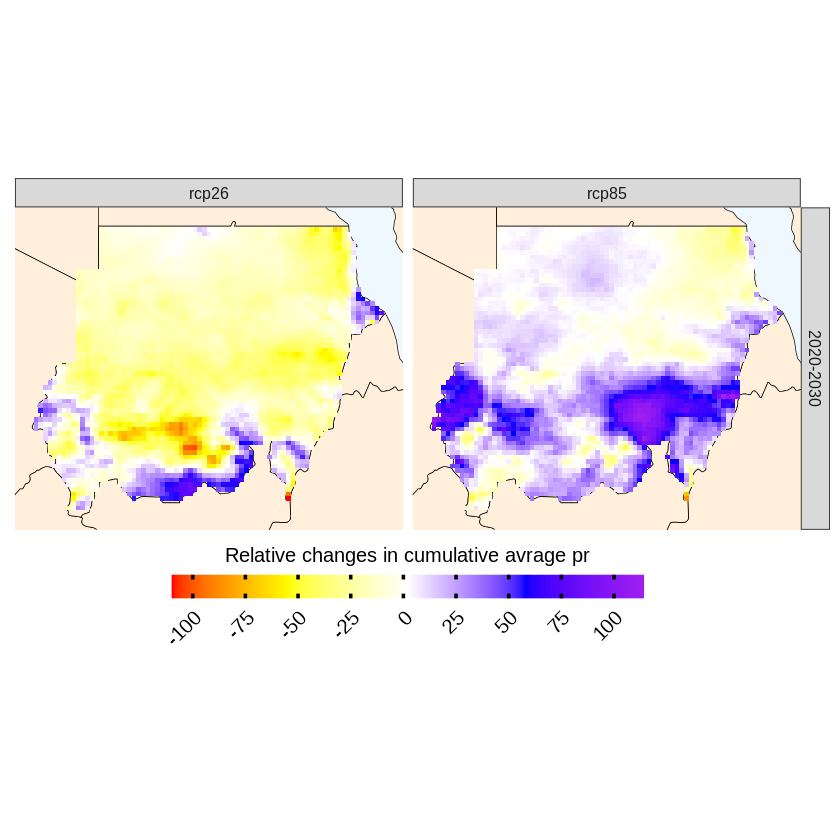

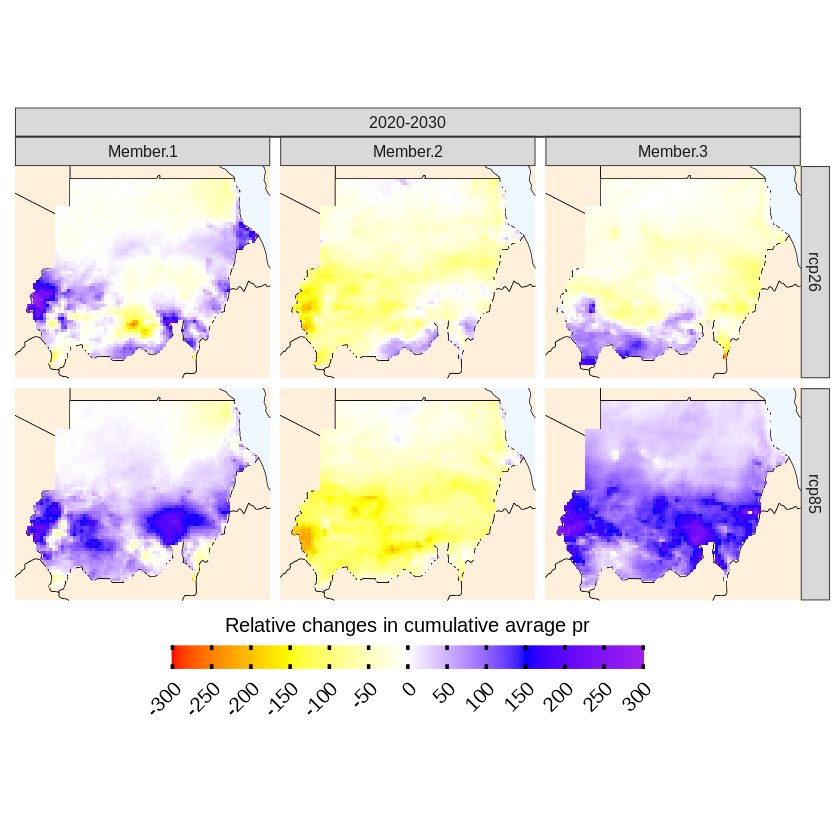

In [10]:
# specify color palette with palette
plotting(ccs , ensemble = TRUE, palette = c("red","yellow", "white", "blue", "purple"), legend_range = NULL,
         plot_titles = "Relative changes in cumulative avrage pr", bins = F, alpha = NA, stat="mean")


# specify color palette with palette
plotting(ccs , ensemble = FALSE, palette = c("red","yellow", "white", "blue", "purple"),
         plot_titles = "Relative changes in cumulative avrage pr", bins = F, alpha = NA, 
         legend_range=c(-300, 300))